# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [56]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [58]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,451,94,37,74,169,59,7,162,41,20,133,178,394,130,63,6,6,198,204
1,470,91,44,66,151,63,7,137,48,18,146,166,280,167,72,1,9,188,194
2,415,101,53,108,184,54,12,216,31,24,172,220,685,187,68,4,24,190,201
3,845,85,36,66,123,55,5,120,56,17,128,140,212,131,73,1,18,186,190
4,780,109,47,96,206,64,9,198,33,23,150,219,586,191,70,4,13,190,198
5,754,91,41,64,148,61,8,129,51,18,142,161,249,153,68,6,12,194,201
6,635,97,41,62,133,56,7,130,52,18,143,158,247,157,78,5,7,184,186
7,155,110,56,103,223,64,5,250,26,27,169,280,928,239,85,4,6,184,183
8,255,112,50,110,186,56,11,214,31,24,159,232,676,203,71,18,27,191,202
9,660,88,35,60,143,59,7,128,52,18,129,147,246,109,62,1,6,202,209


Methods `describe` and `info` deliver some useful information.

In [59]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,417.245902,93.688525,44.932605,82.034608,168.693989,61.735883,8.774135,169.251366,40.894353,20.610200,148.408015,188.958106,441.821494,174.453552,72.744991,6.180328,12.923497,188.699454,195.435337
std,238.699135,8.325686,6.178977,15.661121,33.220745,8.309996,5.169039,33.544102,7.850319,2.619614,14.683933,31.312180,178.539751,32.355520,7.539470,4.826393,8.747762,6.108420,7.440635
min,0.000000,73.000000,34.000000,42.000000,105.000000,47.000000,2.000000,114.000000,26.000000,17.000000,119.000000,131.000000,191.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,223.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,168.000000,320.000000,149.000000,68.000000,2.000000,6.000000,184.000000,190.000000
50%,418.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,174.000000,72.000000,5.000000,12.000000,188.000000,197.000000
75%,620.000000,100.000000,50.000000,98.000000,194.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,596.000000,198.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,322.000000,133.000000,55.000000,265.000000,59.000000,29.000000,188.000000,288.000000,1018.000000,262.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [60]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [61]:
### YOUR CODE HERE
# просто центртруем и нормализуем
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(X_train)  
transformer.transform(X_train)
transformer.transform(X_test)

array([[ 1.05984719,  0.15766527,  0.98283725, ..., -1.47869637,
         0.37696239,  0.34499768],
       [ 0.62375493,  1.72052227,  1.4687973 , ..., -1.47869637,
         0.04924687,  0.21047799],
       [ 1.33240486, -0.92431265, -1.28497634, ...,  0.00875338,
        -0.44232642, -0.59664017],
       ...,
       [ 0.61956173,  0.87898389,  0.49687719, ...,  1.03852629,
         1.36010897,  1.959234  ],
       [ 1.3869164 , -0.08277427,  0.17290382, ..., -1.02101952,
         1.03239345,  1.15211584],
       [-1.25479639, -1.04453242, -0.31305623, ...,  0.12317259,
        -1.425473  , -1.53827802]])

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

[0.7        0.7        0.73636364 0.77272727 0.67889908]
[0.7        0.7        0.73636364 0.77272727 0.67889908]


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

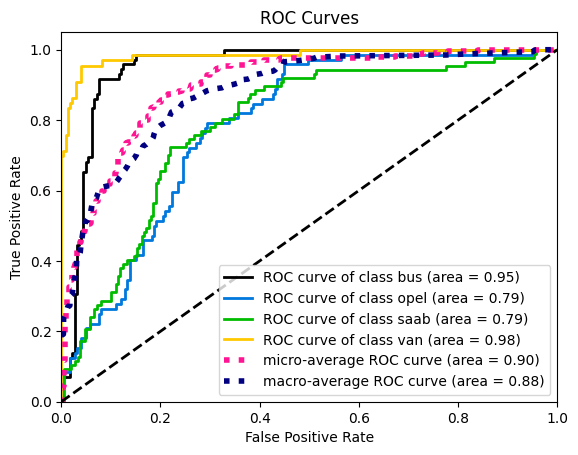

In [62]:
### YOUR CODE HERE
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import scikitplot
from sklearn.model_selection import cross_validate

clf = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,  max_iter=500, random_state=0)
scores = cross_validate(clf, X_train, y_train, scoring=('accuracy', 'f1_micro'), return_train_score=True)

print(scores['test_accuracy'])
print(scores['test_f1_micro'])

clf.fit(X_train, y_train)
scikitplot.metrics.plot_roc(y_test, clf.predict_proba(X_test))

In [63]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

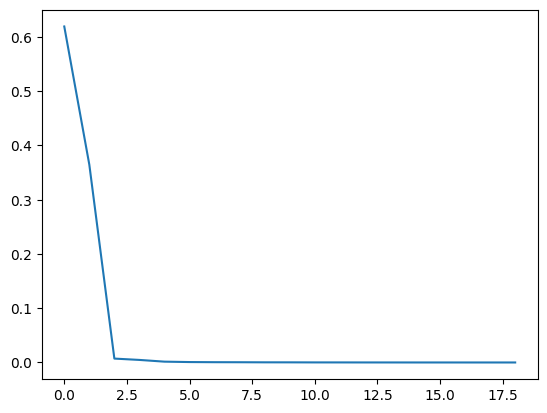

In [64]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train)
plt.plot(pca.explained_variance_ratio_)

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [65]:
### YOUR CODE HERE
# 12 - на основе графика выше
pca = PCA(n_components=12)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

[0.70909091 0.65454545 0.71818182 0.70909091 0.64220183]
[0.70909091 0.65454545 0.71818182 0.70909091 0.64220183]


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

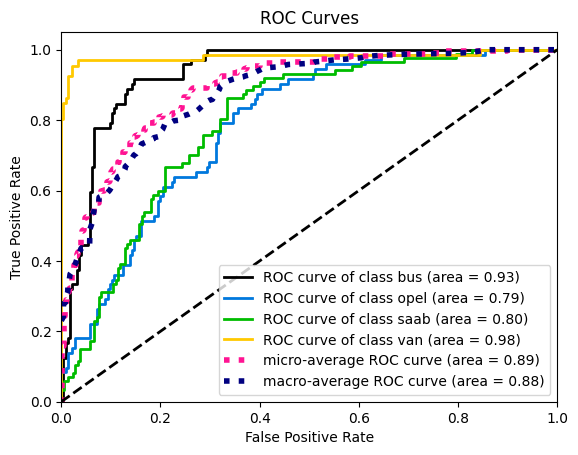

In [66]:
### YOUR CODE HERE

clf = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,  max_iter=500, random_state=0)
scores = cross_validate(clf, X_train, y_train, scoring=('accuracy', 'f1_micro'), return_train_score=True)

print(scores['test_accuracy'])
print(scores['test_f1_micro'])

clf.fit(X_train, y_train)
scikitplot.metrics.plot_roc(y_test, clf.predict_proba(X_test))

Сократили данные, но хуже особо не стало

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

{'max_depth': 6}
0.531986531986532
0.531986531986532


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

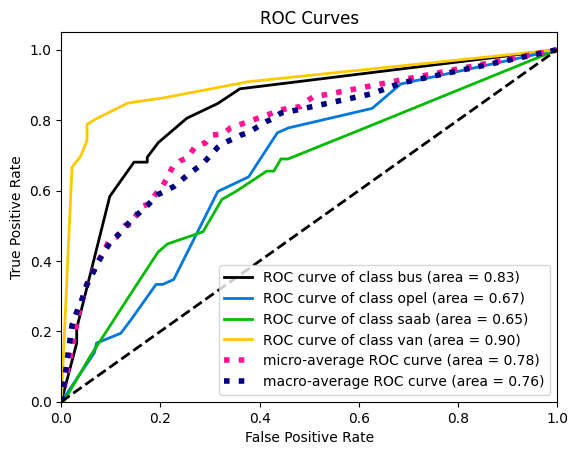

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# YOUR CODE HERE

clf = DecisionTreeClassifier()
scores = GridSearchCV(clf, { 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20] })
scores.fit(X_train, y_train)
print(scores.best_params_)

clf = DecisionTreeClassifier(max_depth=scores.best_params_['max_depth']).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='micro'))

scikitplot.metrics.plot_roc(y_test, clf.predict_proba(X_test))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

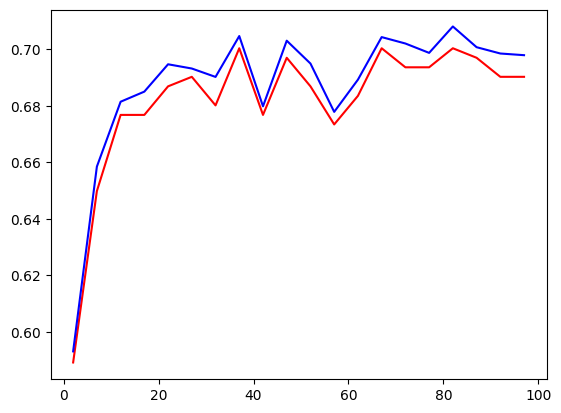

In [68]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier
 
accuracy = []
f1 = []
r = np.arange(2, 100, 5)
for i in r:
    clf = BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=X_train.shape[0], max_features=X_train.shape[1], n_estimators=i).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy.append(accuracy_score(y_pred, y_test))
    f1.append(f1_score(y_pred, y_test, average='macro'))

plt.plot(r, accuracy, color='Red')
plt.plot(r, f1, color='Blue')

Увеличение кол-ва деревьев после примерно 70 не даёт улучшения результата.

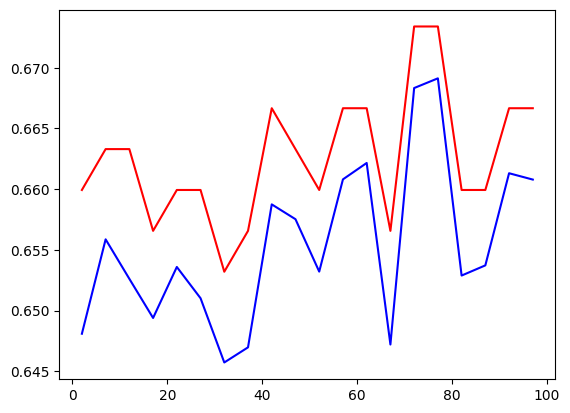

In [69]:
accuracy = []
f1 = []
r = np.arange(2, 100, 5)
for i in r:
    clf = BaggingClassifier(estimator=LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,  max_iter=500, random_state=0), max_samples=X_train.shape[0], max_features=X_train.shape[1], n_estimators=i).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy.append(accuracy_score(y_pred, y_test))
    f1.append(f1_score(y_pred, y_test, average='macro'))

plt.plot(r, accuracy, color='Red')
plt.plot(r, f1, color='Blue')

Логистическая регрессия в ансамблях не работает.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

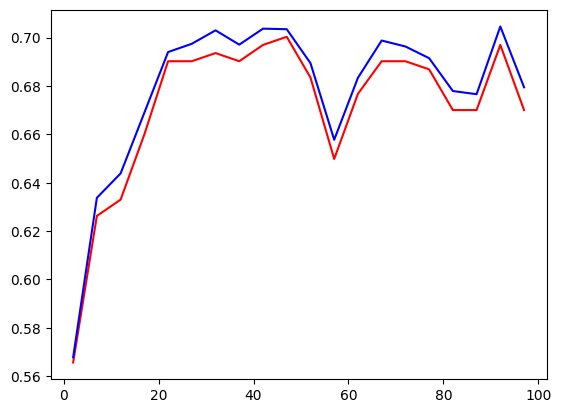

In [70]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
accuracy = []
f1 = []
r = np.arange(2, 100, 5)
for i in r:
    clf = RandomForestClassifier(n_estimators=i, max_samples=X_train.shape[0], max_features=X_train.shape[1]).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy.append(accuracy_score(y_pred, y_test))
    f1.append(f1_score(y_pred, y_test, average='macro'))

plt.plot(r, accuracy, color='Red')
plt.plot(r, f1, color='Blue')

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [71]:
# YOUR CODE HERE
from sklearn.utils import shuffle
import math

X_train, y_train = shuffle(X_train, y_train)
parts = 10
chunk = math.ceil(X_train.shape[0] / parts)

dt_accuracy = []
dt_f1 = []
lr_accuracy = []
lr_f1 = []
rf_accuracy = []
rf_f1 = []
for i in range(parts):
    # decision tree
    clf = DecisionTreeClassifier().fit(X_train[: (i + 1) * chunk], y_train[: (i + 1) * chunk])
    dt_y_pred = clf.predict(X_test)

    dt_accuracy.append(accuracy_score(dt_y_pred, y_test))
    dt_f1.append(f1_score(dt_y_pred, y_test, average='macro'))

    # logistic resression
    clf = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,  max_iter=500, random_state=0).fit(X_train[: (i + 1) * chunk], y_train[: (i + 1) * chunk])
    lr_y_pred = clf.predict(X_test)

    lr_accuracy.append(accuracy_score(lr_y_pred, y_test))
    lr_f1.append(f1_score(lr_y_pred, y_test, average='macro'))

    # random forest
    # 83 из тестов выше
    clf = RandomForestClassifier(n_estimators=83, max_samples=X_train[: (i + 1) * chunk].shape[0], max_features=X_train[: (i + 1) * chunk].shape[1]).fit(X_train[: (i + 1) * chunk], y_train[: (i + 1) * chunk])
    rf_y_pred = clf.predict(X_test)

    rf_accuracy.append(accuracy_score(rf_y_pred, y_test))
    rf_f1.append(f1_score(rf_y_pred, y_test, average='macro'))

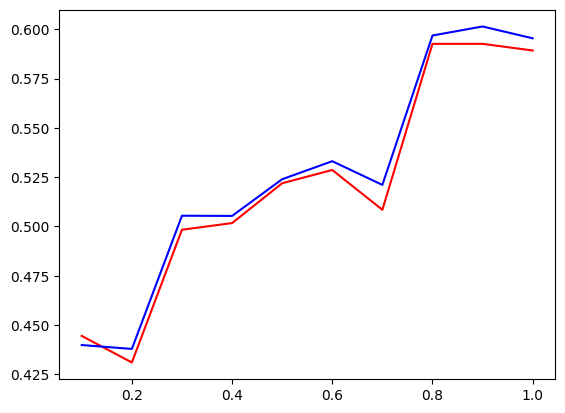

In [72]:
plt.plot([0.1 * (part + 1) for part in range(parts)], dt_accuracy, color='Red')
plt.plot([0.1 * (part + 1) for part in range(parts)], dt_f1, color='Blue')

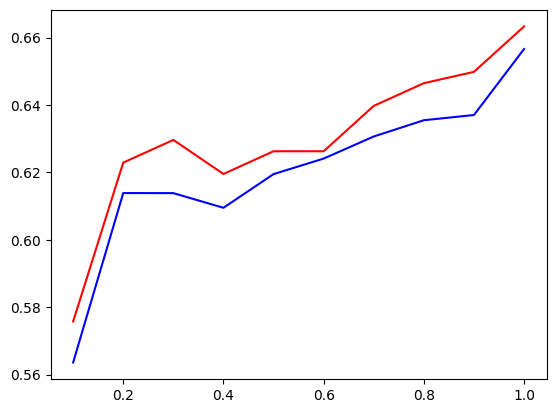

In [73]:
plt.plot([0.1 * (part + 1) for part in range(parts)], lr_accuracy, color='Red')
plt.plot([0.1 * (part + 1) for part in range(parts)], lr_f1, color='Blue')

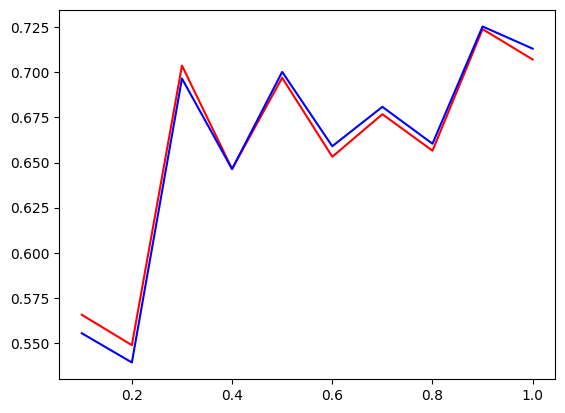

In [74]:
plt.plot([0.1 * (part + 1) for part in range(parts)], rf_accuracy, color='Red')
plt.plot([0.1 * (part + 1) for part in range(parts)], rf_f1, color='Blue')

У всех моделей результат перестаёт быстро улучшаться где то после 60% датасета, даже начинает ухудшаться (кроме random forest модели).  
Построение таких графиков позволяет найти момент переобучения.